# 导入包文件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pyecharts.charts import Bar,Grid,Line,Pie
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode

# 读数据

In [2]:
movies1 = pd.read_json("../data/top_office/movie_item.json",lines=True,encoding='utf-8')
movies2 = pd.read_json("../data/top_mark/movie_item.json",lines=True,encoding='utf-8')

# 数据预览

In [3]:
movies1.iloc[2]

box_office                                            $1,518.8\n      
movie_id                                                  [电影-1866479]
movie_title                                       [复仇者联盟 The Avengers]
release_date                                                  [(2012)]
directedBy                                                     [乔斯·韦登]
starring             [小罗伯特·唐尼, 克里斯·埃文斯, 斯嘉丽·约翰逊, 克里斯·海姆斯沃斯, 杰瑞米·雷纳,...
genre                                                 [动作, 科幻, 奇幻, 冒险]
runtime                                                        [142分钟]
country                                                             美国
language                                                       英语 / 俄语
rating_num                                                       [8.2]
vote_num                                                      [575214]
rating_per_stars5                                                33.6%
rating_per_stars4                                                46.4%
rating

In [4]:
movies2.iloc[2]

country                                                             美国
intro                [\n                                　　克里斯•加纳（威尔...
vote_num                                                      [540872]
movie_title                          [当幸福来敲门 The Pursuit of Happyness]
starring             [威尔·史密斯, 贾登·史密斯, 坦迪·牛顿, 布莱恩·豪威 , 詹姆斯·凯伦, 丹·卡斯泰...
comment_num                                                全部 107675 条
rating_per_stars4                                                35.7%
language                                                       英语 / 粤语
directedBy                                                 [加布里埃莱·穆奇诺]
movie_id                                                  [电影-1849031]
runtime                                                        [117分钟]
rating_per_stars3                                                 8.4%
release_date                                                  [(2006)]
rating_per_stars2                                                 0.5%
rating

In [5]:
movies1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   box_office         273 non-null    object
 1   movie_id           273 non-null    object
 2   movie_title        273 non-null    object
 3   release_date       273 non-null    object
 4   directedBy         273 non-null    object
 5   starring           273 non-null    object
 6   genre              273 non-null    object
 7   runtime            273 non-null    object
 8   country            273 non-null    object
 9   language           273 non-null    object
 10  rating_num         273 non-null    object
 11  vote_num           273 non-null    object
 12  rating_per_stars5  273 non-null    object
 13  rating_per_stars4  273 non-null    object
 14  rating_per_stars3  273 non-null    object
 15  rating_per_stars2  273 non-null    object
 16  rating_per_stars1  273 non-null    object
 1

# 数据格式处理

In [6]:
data = movies1
data["box_office"] = data["box_office"].apply(lambda x: float(x.replace("\n","").strip().replace(",","").replace(".","")[1:]))# $1,515,0\n->15150.0 单位million
data_item=data
data_item['movie_id'] = data_item['movie_id'].apply(lambda x: int(x[0][3:]))
data_item['comment_num'] = data_item['comment_num'].apply(lambda x: int(x[2:-1]))  # 全部 62309 条 -> int(62309)
data_item['question_num'].replace(0 ,"全部0条" , inplace = True)
data_item['question_num'] = data_item['question_num'].apply(lambda x: int(x[2:-1]))  # 全部23个 -> int(23)
data_item['rating_num'] = data_item['rating_num'].apply(lambda x: float(x[0]))   # [9.2] -> float(9.2)
data_item['rating_per_stars1'] = data_item['rating_per_stars1'].apply(lambda x: float(x[:-1]))   # 0.1% -> float(0.1)
data_item['rating_per_stars2'] = data_item['rating_per_stars2'].apply(lambda x: float(x[:-1]))  
data_item['rating_per_stars3'] = data_item['rating_per_stars3'].apply(lambda x: float(x[:-1]))  
data_item['rating_per_stars4'] = data_item['rating_per_stars4'].apply(lambda x: float(x[:-1]))  
data_item['rating_per_stars5'] = data_item['rating_per_stars5'].apply(lambda x: float(x[:-1]))
data_item['release_date'] = data_item['release_date'].apply(lambda x: int(x[0][1:-1]))  # [(1939)] -> int(1939)
data_item['vote_num'] = data_item['vote_num'].apply(lambda x: int(x[0]))   # [272357] -> int(272357)
data_item['movie_title'] = data_item['movie_title'].apply(lambda x: (x[0]))
data_item.loc[15,'runtime'] = ['80分钟']
pattern = '\d+'
import re
data_item['runtime'] = data_item['runtime'].apply(lambda x: (x[0]))
data_item['runtime'] = data_item['runtime'].str.findall(pattern,flags=re.IGNORECASE).apply(lambda x: int(x[0]))
# 介绍变成纯字符串
def Intro(introduces):
    Intro_ = ''
    for intro in introduces:
        intro = intro.strip()
        Intro_ += intro
    return Intro_
data_item['intro'] = data_item.intro.apply(Intro)
data_item.drop_duplicates(subset="movie_id",inplace=True)
movies1 = data_item.sort_values(by ="box_office",ascending=False)
movies1.index= range(len(movies1))
movies1.head(2)

,box_office,movie_id,movie_title,release_date,directedBy,starring,genre,runtime,country,language,rating_num,vote_num,rating_per_stars5,rating_per_stars4,rating_per_stars3,rating_per_stars2,rating_per_stars1,intro,comment_num,question_num
0,27978.0,26100958,复仇者联盟4：终局之战 Avengers: Endgame,2019,"[安东尼·罗素, 乔·罗素]","[小罗伯特·唐尼, 克里斯·埃文斯, 马克·鲁弗洛, 克里斯·海姆斯沃斯, 乔什·布洛林, ...","[剧情, 动作, 科幻, 奇幻, 冒险]",181,美国,英语 / 日语 / 科萨语,8.5,923023,46.1,35.7,15.6,1.9,0.8,一声响指，宇宙间半数生命灰飞烟灭。几近绝望的复仇者们在惊奇队长（布丽·拉尔森 Brie La...,314581,174
1,27897.0,1652587,阿凡达 Avatar,2009,[詹姆斯·卡梅隆],"[萨姆·沃辛顿, 佐伊·索尔达娜, 西格妮·韦弗, 史蒂芬·朗, 米歇尔·罗德里格兹, 吉奥...","[动作, 科幻, 冒险]",162,美国 / 英国,英语 / 西班牙语,8.7,1046959,50.8,36.7,11.3,0.9,0.3,战斗中负伤而下身瘫痪的前海军战士杰克•萨利（萨姆•沃辛顿 Sam Worthington 饰...,206783,17


In [7]:
data_item = movies2
data_item['movie_id'] = data_item['movie_id'].apply(lambda x: int(x[0][3:]))  # [电影-1300267] -> int(1300267)
data_item['comment_num'] = data_item['comment_num'].apply(lambda x: int(x[2:-1]))  # 全部 62309 条 -> int(62309)
data_item['question_num'] = data_item['question_num'].apply(lambda x: int(x[2:-1]))  # 全部23个 -> int(23)
data_item['rating_num'] = data_item['rating_num'].apply(lambda x: float(x[0]))   # [9.2] -> float(9.2)
data_item['rating_per_stars1'] = data_item['rating_per_stars1'].apply(lambda x: float(x[:-1]))   # 0.1% -> float(0.1)
data_item['rating_per_stars2'] = data_item['rating_per_stars2'].apply(lambda x: float(x[:-1]))  
data_item['rating_per_stars3'] = data_item['rating_per_stars3'].apply(lambda x: float(x[:-1]))  
data_item['rating_per_stars4'] = data_item['rating_per_stars4'].apply(lambda x: float(x[:-1]))  
data_item['rating_per_stars5'] = data_item['rating_per_stars5'].apply(lambda x: float(x[:-1]))
data_item['release_date'] = data_item['release_date'].apply(lambda x: int(x[0][1:-1]))  # [(1939)] -> int(1939)
data_item['vote_num'] = data_item['vote_num'].apply(lambda x: int(x[0]))   # [272357] -> int(272357)
data_item['movie_title'] = data_item['movie_title'].apply(lambda x: (x[0]))

# [238分钟] -> 238
data_item.loc[15,'runtime'] = ['80分钟']
pattern = '\d+'
import re
data_item['runtime'] = data_item['runtime'].apply(lambda x: (x[0]))
data_item['runtime'] = data_item['runtime'].str.findall(pattern,flags=re.IGNORECASE).apply(lambda x: int(x[0]))

def Intro(introduces):
    Intro_ = ''
    for intro in introduces:
        intro = intro.strip()
        Intro_ += intro
    return Intro_
data_item['intro'] = data_item.intro.apply(Intro)
data_item.drop_duplicates(subset="movie_id",inplace=True)
movies2 = data_item.sort_values(by ="rating_num",ascending=False)
movies2.index= range(len(movies2))
movies2.head(2)

,country,intro,vote_num,movie_title,starring,comment_num,rating_per_stars4,language,directedBy,movie_id,runtime,rating_per_stars3,release_date,rating_per_stars2,rating_per_stars5,rating_num,genre,rating_per_stars1,question_num
0,美国,20世纪40年代末，小有成就的青年银行家安迪（蒂姆·罗宾斯 Tim Robbins 饰）因涉...,877684,肖申克的救赎 The Shawshank Redemption,"[蒂姆·罗宾斯, 摩根·弗里曼, 鲍勃·冈顿, 威廉姆·赛德勒, 克兰西·布朗, 吉尔·贝罗...",206334,15.7,英语,[弗兰克·德拉邦特],1292052,142,2.0,1994,0.1,82.1,9.6,"[剧情, 犯罪]",0.1,74
1,美国,伦敦著名刑案辩护律师韦菲爵士（查尔斯•劳顿 Charles Laughton 饰）接受了心脏...,85177,控方证人 Witness for the Prosecution,"[泰隆·鲍华, 玛琳·黛德丽, 查尔斯·劳顿, 爱尔莎·兰切斯特, 约翰·威廉姆斯, 亨利·...",34646,17.7,英语 / 德语,[比利·怀尔德],1296141,116,1.9,1957,0.1,80.3,9.6,"[剧情, 悬疑, 犯罪]",0.1,37


In [8]:
movies = pd.concat([movies1,movies2])
movies = movies.drop_duplicates(["movie_id"])
movies1.to_csv("movies_piaofang.csv",index=False)
movies2.to_csv("movies_pingfen.csv",index=False)

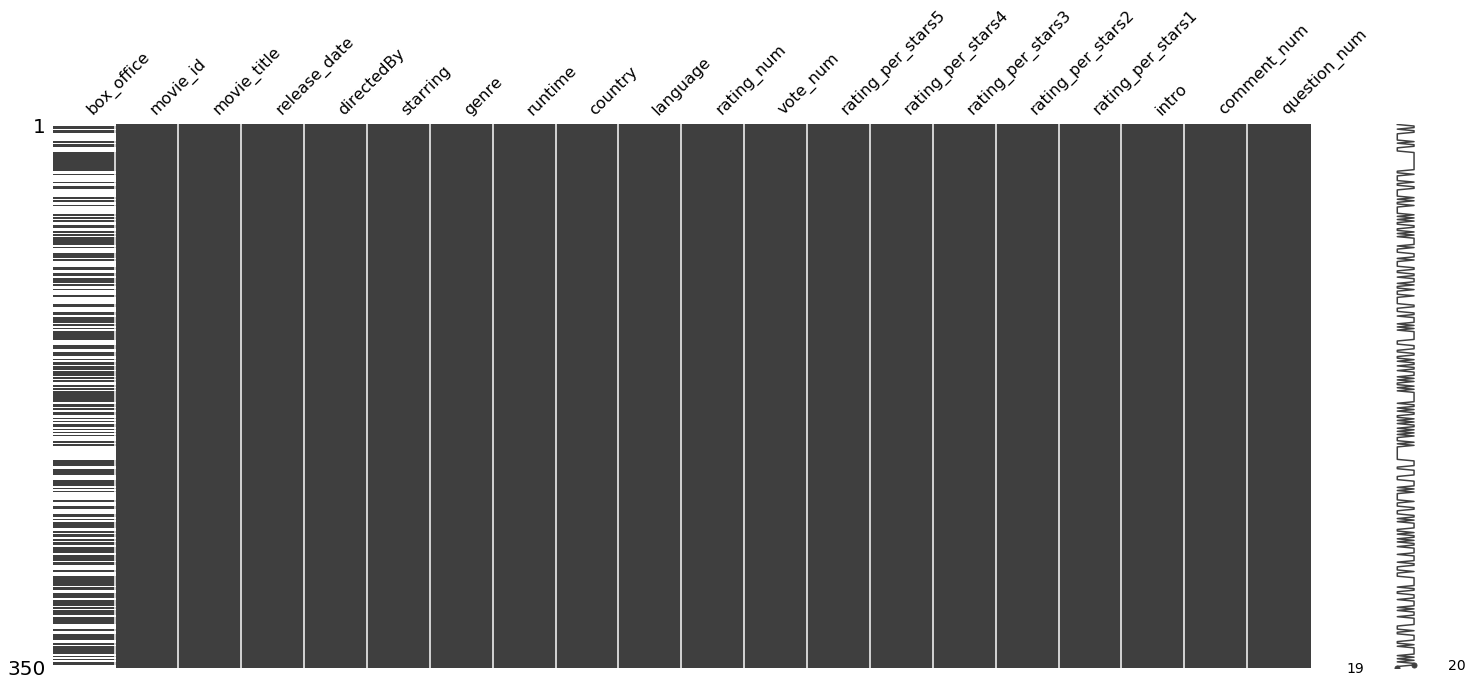

In [14]:
import missingno as msno
msno.matrix(movies.sample(350))

In [8]:
movies.shape

(464, 20)

In [9]:
from pyecharts.charts import Bar, Line
dup_movie =  pd.merge(movies1,movies2,on=["movie_id"],how='inner')
dup_movie
bar_ = (
    Bar()
    .add_xaxis(xaxis_data=dup_movie["movie_title_x"].values.tolist())
    .add_yaxis(
        "票房",
        dup_movie["box_office"].values.tolist(),
           yaxis_index=1,
        label_opts=opts.LabelOpts(is_show=False)
    )
)
bar = (
    Bar(init_opts=opts.InitOpts(width="900px", height="500px"))
    .add_xaxis(xaxis_data=dup_movie["movie_title_x"].values.tolist())
    .add_yaxis(
        "评分",
        dup_movie["rating_num_y"].values.tolist(),
        label_opts=opts.LabelOpts(is_show=False),
    )

    .extend_axis(
        yaxis=opts.AxisOpts(
            name="票房",
            type_="value",
            min_=1000,
            max_=30000,
            interval=5000,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        )
    )

    .set_global_opts(
        title_opts=opts.TitleOpts(title="高分高票房电影柱状图"),
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
            axislabel_opts=opts.LabelOpts(rotate=-30)
        ),
        yaxis_opts=opts.AxisOpts(
            name="评分",
            type_="value",
            min_=8,
            max_=10,
            interval=0.5,
            axislabel_opts=opts.LabelOpts(formatter="{value} "),
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
    .overlap(bar_)
)
bar.render_notebook()


In [10]:

value1 =[]#m1数量 
value2 =[] #m2数量
value3 =[]#年代平均得分
name = []
for i in range(1930,2022):
    value1.append(movies1[movies1["release_date"]==i].shape[0])
    value2.append(movies2[movies2["release_date"]==i].shape[0])
    movies2["release_date"]==i
    value3.append
    name.append(str(i))
    
bar = (
    Bar(init_opts=opts.InitOpts(width="950px", height="500px"))
    .add_xaxis(name)
    .add_yaxis("票房TOP",value1)
    .add_yaxis("评分TOP",value2)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="电影年代分布柱状图"),
        datazoom_opts=[opts.DataZoomOpts(),opts.DataZoomOpts(type_="inside")]
    )
)
bar.render_notebook()

In [11]:
# -------pyecharts--------子图显示
# line1= (
#     Line()
#     .add_xaxis(year1)
#     .add_yaxis("票房TOP",mark1)
#     .set_global_opts(title_opts=opts.TitleOpts(title=""),
#                      legend_opts=opts.LegendOpts( pos_left=600),
#                     yaxis_opts=opts.AxisOpts(
# 	                min_=7))
# )
# line2= (
#     Line()
#     .add_xaxis(year2)
#     .add_yaxis("评分TOP",mark2)
#     .set_global_opts(title_opts=opts.TitleOpts(title="电影评分年代变化折线图"),
#                       legend_opts=opts.LegendOpts( pos_left=700),
#                     yaxis_opts=opts.AxisOpts(
# 	                min_=7))
# )
# grid = (
#         Grid(init_opts=opts.InitOpts(width="900px", height="500px"))
#         .add(line1, grid_opts=opts.GridOpts(pos_top='10%',pos_bottom="50%"))
#         .add(line2, grid_opts=opts.GridOpts(pos_top='60%'))
# )
# grid.render_notebook()


In [12]:
v1= movies1.groupby(["release_date"])["rating_num"].mean()
mark1 =[float("%.1f"%x) for x in v1.values.tolist()]  #年代电影平均得分 
year1=[str(x) for x in v1.index.tolist()]
v2= movies2.groupby(["release_date"])["rating_num"].mean()
mark2 =[float("%.1f"%x) for x in v2.values.tolist()]  #年代电影平均得分 
year2=[str(x) for x in v2.index.tolist()]
js_formatter = """function (params) {
        console.log(params);
        return '年代  ' + params.value ;
    }"""
line=(Line(init_opts=opts.InitOpts(width="900px", height="500px"))
    .add_xaxis(
        xaxis_data=year1
    )
    .extend_axis(
        xaxis_data=year2,
        xaxis=opts.AxisOpts(
            type_="category",
            axistick_opts=opts.AxisTickOpts(is_align_with_label=True),
            axisline_opts=opts.AxisLineOpts(
                is_on_zero=False, linestyle_opts=opts.LineStyleOpts(color="#6e9ef1")
            ),
            axispointer_opts=opts.AxisPointerOpts(
                is_show=True, label=opts.LabelOpts(formatter=JsCode(js_formatter))
            ),
        ),
    )
    .add_yaxis(
        series_name="票房TOP",
        symbol="emptyCircle",
        is_symbol_show=False,
        # xaxis_index=1,
        color="#d14a61",
        y_axis=mark1,
        label_opts=opts.LabelOpts(is_show=True),
        linestyle_opts=opts.LineStyleOpts(width=2),
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
        
    )
    .add_yaxis(
        series_name="评分TOP",
        symbol="emptyCircle",
        is_symbol_show=False,
        color="#6e9ef1",
        y_axis=mark2,
        label_opts=opts.LabelOpts(is_show=True),
        linestyle_opts=opts.LineStyleOpts(width=2),
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
    .set_global_opts(
        legend_opts=opts.LegendOpts(),
        tooltip_opts=opts.TooltipOpts(trigger="none", axis_pointer_type="cross"),
        title_opts=opts.TitleOpts(title="电影评分年代分布折线图"),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axistick_opts=opts.AxisTickOpts(is_align_with_label=True),
            axisline_opts=opts.AxisLineOpts(
                is_on_zero=False, linestyle_opts=opts.LineStyleOpts(color="#d14a61")
            ),
            axispointer_opts=opts.AxisPointerOpts(
                is_show=True, label=opts.LabelOpts(formatter=JsCode(js_formatter))
            ),
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",min_=7,
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(opacity=1)
            ),
        ),
    )

)
line.render_notebook()

## 分析: 电影在1980年后迎来了爆发式的增长，

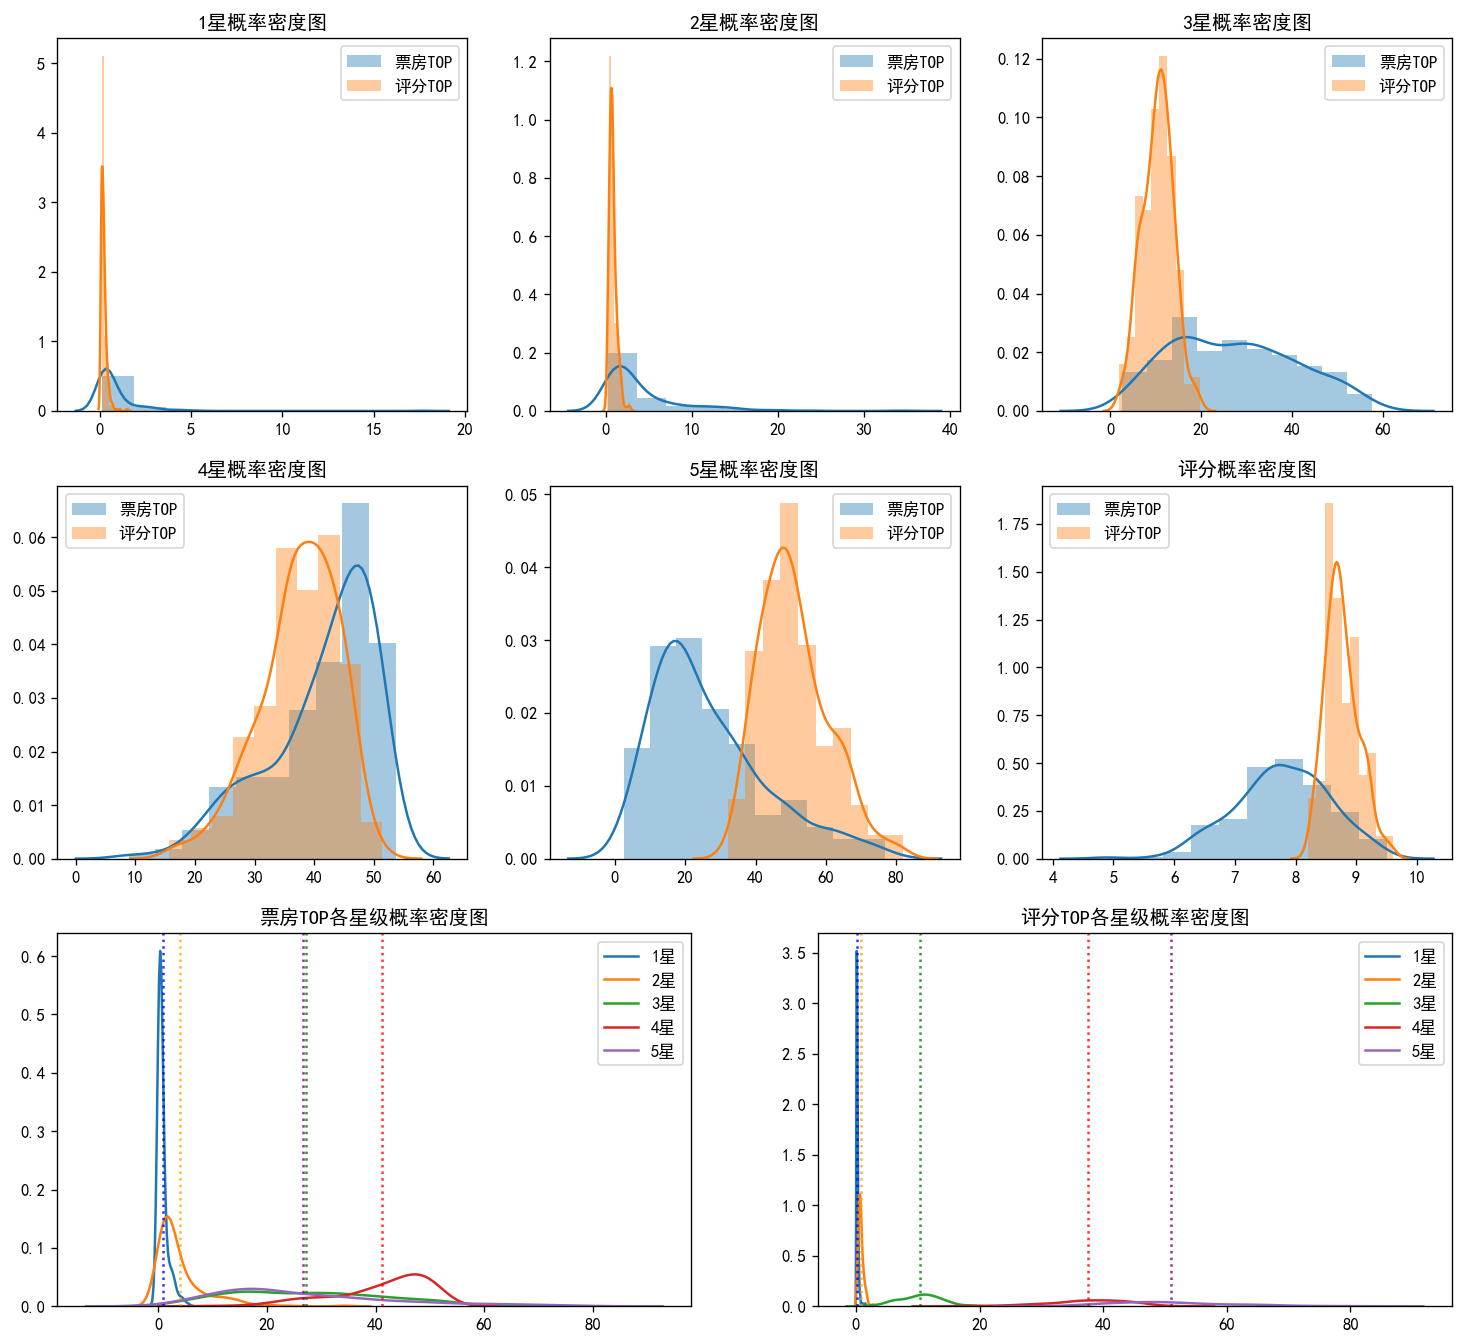

In [13]:
# 因为横坐标很小所以可能存在纵坐标大于1的情况
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15,14), dpi=120)
ax1 = plt.subplot(331)
plt.title("1星概率密度图")
sns.distplot(movies1[["rating_per_stars1"]],bins=10,label="票房TOP")
sns.distplot(movies2[["rating_per_stars1"]],bins=10,label="评分TOP")
plt.legend()
ax1 = plt.subplot(332)
plt.title("2星概率密度图")
sns.distplot(movies1[["rating_per_stars2"]],bins=10,label="票房TOP")
sns.distplot(movies2[["rating_per_stars2"]],bins=10,label="评分TOP")
plt.legend()
ax1 = plt.subplot(333)
plt.title("3星概率密度图")
sns.distplot(movies1[["rating_per_stars3"]],bins=10,label="票房TOP")
sns.distplot(movies2[["rating_per_stars3"]],bins=10,label="评分TOP")
plt.legend()
ax1 = plt.subplot(334)
plt.title("4星概率密度图")
sns.distplot(movies1[["rating_per_stars4"]],bins=10,label="票房TOP")
sns.distplot(movies2[["rating_per_stars4"]],bins=10,label="评分TOP")
plt.legend()
ax1 = plt.subplot(335)
plt.title("5星概率密度图")
sns.distplot(movies1[["rating_per_stars5"]],bins=10,label="票房TOP")
sns.distplot(movies2[["rating_per_stars5"]],bins=10,label="评分TOP")
plt.legend()
ax1 = plt.subplot(336)
plt.title("评分概率密度图")
sns.distplot(movies1[["rating_num"]],bins=10,label="票房TOP")
sns.distplot(movies2[["rating_num"]],bins=10,label="评分TOP")
plt.legend()
ax1 = plt.subplot(325)
plt.title("票房TOP各星级概率密度图")
sns.distplot(movies1[["rating_per_stars1"]],bins=10,label="1星",hist = False)
sns.distplot(movies1[["rating_per_stars2"]],bins=10,label="2星",hist = False)
sns.distplot(movies1[["rating_per_stars3"]],bins=10,label="3星",hist = False)
sns.distplot(movies1[["rating_per_stars4"]],bins=10,label="4星",hist = False)
sns.distplot(movies1[["rating_per_stars5"]],bins=10,label="5星",hist = False)
plt.axvline(movies1["rating_per_stars1"].mean(),color ='b',linestyle=":",alpha=0.8) 
plt.axvline(movies1["rating_per_stars2"].mean(),color ='orange',linestyle=":",alpha=0.8) 
plt.axvline(movies1["rating_per_stars3"].mean(),color ='g',linestyle=":",alpha=0.8) 
plt.axvline(movies1["rating_per_stars4"].mean(),color ='r',linestyle=":",alpha=0.8) 
plt.axvline(movies1["rating_per_stars5"].mean(),color='purple',linestyle=":",alpha=0.8) 
plt.legend()
ax1 = plt.subplot(326)
plt.title("评分TOP各星级概率密度图")
sns.distplot(movies2[["rating_per_stars1"]],bins=10,label="1星",hist = False)
sns.distplot(movies2[["rating_per_stars2"]],bins=10,label="2星",hist = False)
sns.distplot(movies2[["rating_per_stars3"]],bins=10,label="3星",hist = False)
sns.distplot(movies2[["rating_per_stars4"]],bins=10,label="4星",hist = False)
sns.distplot(movies2[["rating_per_stars5"]],bins=10,label="5星",hist = False)
plt.axvline(movies2["rating_per_stars1"].mean(),color ='b',linestyle=":",alpha=0.8) 
plt.axvline(movies2["rating_per_stars2"].mean(),color ='orange',linestyle=":",alpha=0.8) 
plt.axvline(movies2["rating_per_stars3"].mean(),color ='g',linestyle=":",alpha=0.8) 
plt.axvline(movies2["rating_per_stars4"].mean(),color ='r',linestyle=":",alpha=0.8) 
plt.axvline(movies2["rating_per_stars5"].mean(),color='purple',linestyle=":",alpha=0.8) 
plt.legend()

d:\anaconda\envs\datamining\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


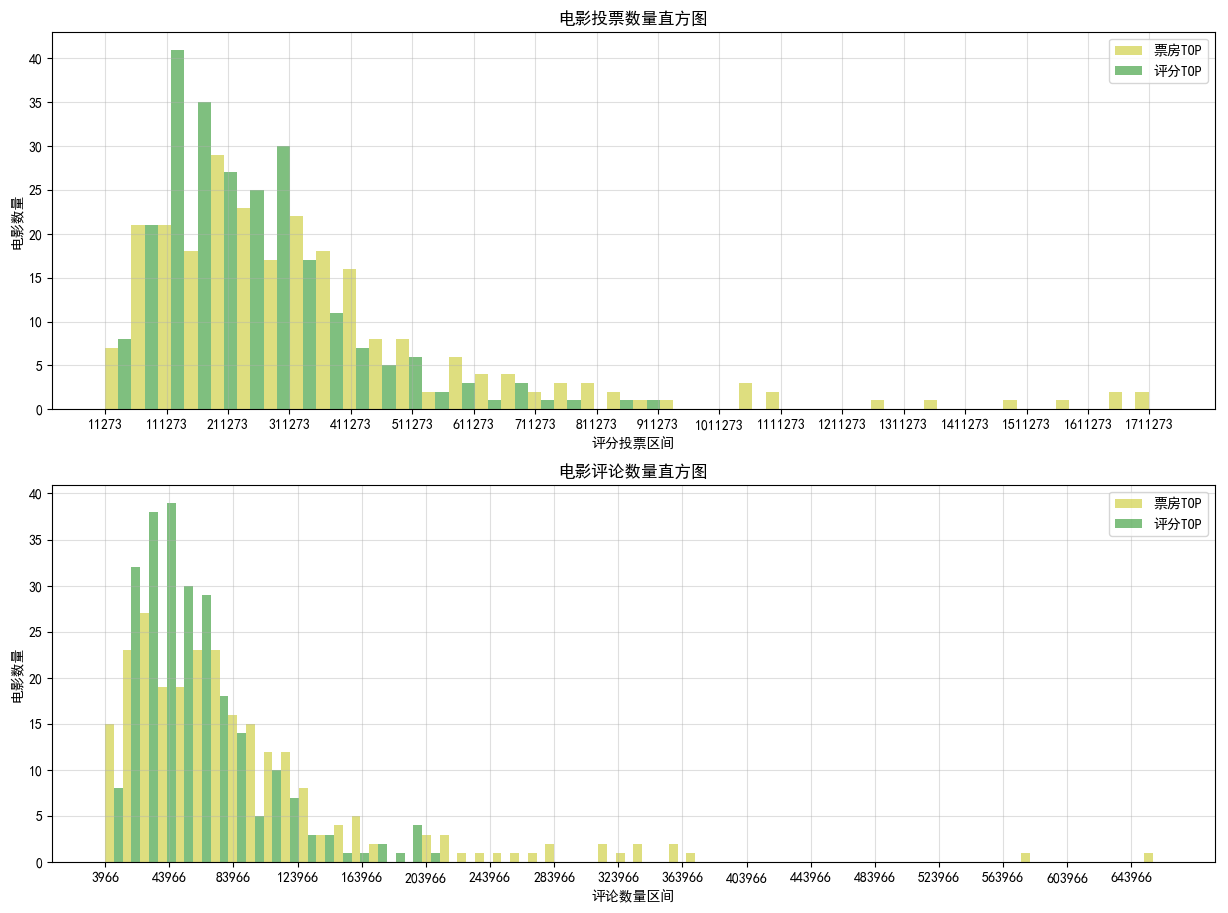

In [14]:

plt.figure(figsize=(15,11), dpi=100)
minn = int(min(movies1["vote_num"].values))
maxx = int(max(movies1["vote_num"].values))
ax1 = plt.subplot(211)
n1, bins1, patches1= plt.hist([movies1["vote_num"].values,movies2["vote_num"].values],
                              bins=40,   density=False, color=['y','g'], alpha=0.5,rwidth=1, label = ['票房TOP',"评分TOP"],range=(minn,maxx))
plt.xticks(np.arange(minn,maxx,100000))
plt.grid(alpha=0.4)
plt.title("电影投票数量直方图")
plt.xlabel("评分投票区间")
plt.ylabel("电影数量")
plt.legend()
ax2 = plt.subplot(212)
minn = int(min(movies1["comment_num"].values))
maxx = int(max(movies1["comment_num"].values))
n1, bins1, patches1= plt.hist([movies1["comment_num"].values,movies2["comment_num"].values],bins=60,  density=False, color=['y','g'], alpha=0.5,rwidth=1, label =['票房TOP',"评分TOP"])
plt.xticks(np.arange(minn,maxx,40000))
plt.title("电影评论数量直方图")
plt.xlabel("评论数量区间")
plt.ylabel("电影数量")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

In [15]:
class_movie = set()
for ls in movies["genre"].values:
    for l in ls:
        class_movie.add(l)
class_movie = list(class_movie)
country_movie = set()
for ls in movies["country"].values:
    cn = ls.split('/')
    for l in cn:
        if (l.strip() == "香港") or (l.strip() == "台湾"):
            continue;
        country_movie.add(l.strip())
country_movie = list(country_movie)
# 电影类型转化成one-hot编码
def column_expand(data, column, list_values):
    for cl in list_values:
        # 正则表达式
        tt = data[column].apply(lambda x: str(x)).str.contains('\W'+cl+'\W')
        uu = data[column].apply(lambda x: str(x)).str.contains('^'+cl+'$')
        ee = data[column].apply(lambda x: str(x)).str.contains(cl+'\s')
        ff = data[column].apply(lambda x: str(x)).str.contains('\s'+cl)
        if cl =="中国香港" or cl =="中国台湾":
            tt = data[column].apply(lambda x: str(x)).str.contains('\W'+cl[2:4]+'\W')
            uu = data[column].apply(lambda x: str(x)).str.contains('^'+cl[2:4]+'$')
            ee = data[column].apply(lambda x: str(x)).str.contains(cl[2:4]+'\s')
            ff = data[column].apply(lambda x: str(x)).str.contains('\s'+cl[2:4])
        cl_ = tt | uu| ee | ff
        # 将boolean类型转化成0或者1
        cl_ *= 1
        data['%s_%s' %(column ,cl)] = cl_
# 统计数据
def census(data, column, list_values):
    column_expand(data, column, list_values)
    df = pd.DataFrame( 
        {'数目':[data['%s_%s' %(column, p)].sum() for p in list_values]}
        , index=list_values).sort_values('数目', ascending=False)
    return df

In [16]:
from pyecharts.faker import Faker
class_num1= census(movies1,"genre",class_movie)
class_num2= census(movies2,"genre",class_movie)
v1 = class_num1["数目"].values.tolist()
n1 = class_num1["数目"].index.tolist()
v2 = class_num2["数目"].values.tolist()
n2 = class_num2["数目"].index.tolist()
r,g,b=0,100,0
# lt=[]
# for i in range(1,11):
#     lt.append("rgb(%d,%d,%d)"%(r+i*20,g+i*12,b+i*20))
# print(lt)
c1= (
    Pie(init_opts=opts.InitOpts(width="900px", height="500px"))
    .add("", [list(z) for z in zip(n1, v1)],
        center=["25%", "60%"],
        radius=["0%", "35%"] )
    #     .set_colors(lt)

   .set_global_opts(
        title_opts=opts.TitleOpts(title="票房TOP电影类型占比饼图",pos_top="93%",pos_left="15%"),
        legend_opts=opts.LegendOpts( pos_top="5%"),
    )
)
c2 =(
    Pie()
        .add("", [list(z) for z in zip(n2, v2)],
        center=["75%", "60%"],
       radius=["0%", "35%"])
    
    .set_global_opts(
         title_opts=opts.TitleOpts(title="高分TOP电影类型占比饼图",pos_top="93%",pos_left="67%"),
        legend_opts=opts.LegendOpts( is_show=False)
    )
)
grid = (
        Grid(init_opts=opts.InitOpts(width="900px", height="500px"))
        .add(c1, grid_opts=opts.GridOpts(pos_top='10%'))
        .add(c2, grid_opts=opts.GridOpts(pos_top='10%'))
)
grid.render_notebook()


In [17]:
country_num= census(movies2,"country",country_movie)
country_num.loc["中国"] = country_num.loc["中国大陆"]+country_num.loc["中国香港"]+country_num.loc["中国台湾"]
country_num.drop( ["中国大陆","中国香港","中国台湾","马耳他","西德"],inplace = True)
inx = country_num["数目"].index
val = country_num["数目"].values
data_sum = country_num["数目"].sum()
subtitle = ""
inx=inx.tolist()

nameMap = {        'Singapore Rep.': '新加坡',        'Dominican Rep.': '多米尼加',        'Palestine': '巴勒斯坦',        'Bahamas': '巴哈马',        'Timor-Leste': '东帝汶',        'Afghanistan': '阿富汗',        'Guinea-Bissau': '几内亚比绍',        "Côte d'Ivoire": '科特迪瓦',        'Siachen Glacier': '锡亚琴冰川',        "Br. Indian Ocean Ter.": '英属印度洋领土',        'Angola': '安哥拉',        'Albania': '阿尔巴尼亚',        'United Arab Emirates': '阿联酋',        'Argentina': '阿根廷',        'Armenia': '亚美尼亚',        'French Southern and Antarctic Lands': '法属南半球和南极领地',        'Australia': '澳大利亚',        'Austria': '奥地利',        'Azerbaijan': '阿塞拜疆',        'Burundi': '布隆迪',        'Belgium': '比利时',        'Benin': '贝宁',        'Burkina Faso': '布基纳法索',        'Bangladesh': '孟加拉国',        'Bulgaria': '保加利亚',        'The Bahamas': '巴哈马',        'Bosnia and Herz.': '波斯尼亚和黑塞哥维那',        'Belarus': '白俄罗斯',        'Belize': '伯利兹',        'Bermuda': '百慕大',        'Bolivia': '玻利维亚',        'Brazil': '巴西',        'Brunei': '文莱',        'Bhutan': '不丹',        'Botswana': '博茨瓦纳',        'Central African Rep.': '中非',        'Canada': '加拿大',        'Switzerland': '瑞士',        'Chile': '智利',        'China': '中国',        'Ivory Coast': '象牙海岸',        'Cameroon': '喀麦隆',        'Dem. Rep. Congo': '刚果民主共和国',        'Congo': '刚果',        'Colombia': '哥伦比亚',        'Costa Rica': '哥斯达黎加',        'Cuba': '古巴',        'N. Cyprus': '北塞浦路斯',        'Cyprus': '塞浦路斯',        'Czech Rep.': '捷克',        'Germany': '德国',        'Djibouti': '吉布提',        'Denmark': '丹麦',        'Algeria': '阿尔及利亚',        'Ecuador': '厄瓜多尔',        'Egypt': '埃及',        'Eritrea': '厄立特里亚',        'Spain': '西班牙',        'Estonia': '爱沙尼亚',        'Ethiopia': '埃塞俄比亚',        'Finland': '芬兰',        'Fiji': '斐',        'Falkland Islands': '福克兰群岛',        'France': '法国',        'Gabon': '加蓬',        'United Kingdom': '英国',        'Georgia': '格鲁吉亚',        'Ghana': '加纳',        'Guinea': '几内亚',        'Gambia': '冈比亚',        'Guinea Bissau': '几内亚比绍',        'Eq. Guinea': '赤道几内亚',        'Greece': '希腊',        'Greenland': '格陵兰',        'Guatemala': '危地马拉',        'French Guiana': '法属圭亚那',        'Guyana': '圭亚那',        'Honduras': '洪都拉斯',        'Croatia': '克罗地亚',        'Haiti': '海地',        'Hungary': '匈牙利',        'Indonesia': '印度尼西亚',        'India': '印度',        'Ireland': '爱尔兰',        'Iran': '伊朗',        'Iraq': '伊拉克',        'Iceland': '冰岛',        'Israel': '以色列',        'Italy': '意大利',        'Jamaica': '牙买加',        'Jordan': '约旦',        'Japan': '日本',        'Kazakhstan': '哈萨克斯坦',        'Kenya': '肯尼亚',        'Kyrgyzstan': '吉尔吉斯斯坦',        'Cambodia': '柬埔寨',        'Korea': '韩国',        'Kosovo': '科索沃',        'Kuwait': '科威特',        'Lao PDR': '老挝',        'Lebanon': '黎巴嫩',        'Liberia': '利比里亚',        'Libya': '利比亚',        'Sri Lanka': '斯里兰卡',        'Lesotho': '莱索托',        'Lithuania': '立陶宛',        'Luxembourg': '卢森堡',        'Latvia': '拉脱维亚',        'Morocco': '摩洛哥',        'Moldova': '摩尔多瓦',        'Madagascar': '马达加斯加',        'Mexico': '墨西哥',        'Macedonia': '马其顿',        'Mali': '马里',        'Myanmar': '缅甸',        'Montenegro': '黑山',        'Mongolia': '蒙古',        'Mozambique': '莫桑比克',        'Mauritania': '毛里塔尼亚',        'Malawi': '马拉维',        'Malaysia': '马来西亚',        'Namibia': '纳米比亚',        'New Caledonia': '新喀里多尼亚',        'Niger': '尼日尔',        'Nigeria': '尼日利亚',        'Nicaragua': '尼加拉瓜',        'Netherlands': '荷兰',        'Norway': '挪威',        'Nepal': '尼泊尔',        'New Zealand': '新西兰',        'Oman': '阿曼',        'Pakistan': '巴基斯坦',        'Panama': '巴拿马',        'Peru': '秘鲁',        'Philippines': '菲律宾',        'Papua New Guinea': '巴布亚新几内亚',        'Poland': '波兰',        'Puerto Rico': '波多黎各',        'Dem. Rep. Korea': '朝鲜',        'Portugal': '葡萄牙',        'Paraguay': '巴拉圭',        'Qatar': '卡塔尔',        'Romania': '罗马尼亚',        'Russia': '俄罗斯',        'Rwanda': '卢旺达',        'W. Sahara': '西撒哈拉',        'Saudi Arabia': '沙特阿拉伯',        'Sudan': '苏丹',        'S. Sudan': '南苏丹',        'Senegal': '塞内加尔',        'Solomon Is.': '所罗门群岛',        'Sierra Leone': '塞拉利昂',        'El Salvador': '萨尔瓦多',        'Somaliland': '索马里兰',        'Somalia': '索马里',        'Serbia': '塞尔维亚',        'Suriname': '苏里南',        'Slovakia': '斯洛伐克',        'Slovenia': '斯洛文尼亚',        'Sweden': '瑞典',        'Swaziland': '斯威士兰',        'Syria': '叙利亚',        'Chad': '乍得',        'Togo': '多哥',        'Thailand': '泰国',        'Tajikistan': '塔吉克斯坦',        'Turkmenistan': '土库曼斯坦',        'East Timor': '东帝汶',        'Trinidad and Tobago': '特里尼达和多巴哥',        'Tunisia': '突尼斯',        'Turkey': '土耳其',        'Tanzania': '坦桑尼亚',        'Uganda': '乌干达',        'Ukraine': '乌克兰',        'Uruguay': '乌拉圭',        'United States': '美国',        'Uzbekistan': '乌兹别克斯坦',        'Venezuela': '委内瑞拉',        'Vietnam': '越南',        'Vanuatu': '瓦努阿图',        'West Bank': '西岸',        'Yemen': '也门',        'South Africa': '南非',        'Zambia': '赞比亚',        'Zimbabwe': '津巴布韦',        'Dem.Rep.Congo': '刚果（金）',        'Congo': '刚果（布）',        'Central African Rep.': '中非共和国',        'Sudan': '苏丹',        'Greenland': '格陵兰岛',        'Bangladesh': '孟加拉'    }
for a in range(len(inx)):
    for b in nameMap.keys():
        if inx[a] == nameMap[b]:
            inx[a] = b
        else:
            continue

inx1 = inx
val1= val
print( [list(z) for z in zip(inx1, val1)])

[['United States', 141], ['United Kingdom', 34], ['Japan', 29], ['France', 27], ['Germany', 19], ['Italy', 10], ['Korea', 8], ['Canada', 7], ['Spain', 5], ['Australia', 5], ['Switzerland', 4], ['New Zealand', 3], ['Thailand', 2], ['India', 2], ['Iran', 2], ['Ireland', 2], ['Brazil', 2], ['South Africa', 2], ['Poland', 1], ['Austria', 1], ['Czech Rep.', 1], ['Sweden', 1], ['United Arab Emirates', 1], ['Botswana', 1], ['Argentina', 1], ['Denmark', 1], ['Belgium', 1], ['Netherlands', 0], ['Morocco', 0], ['Russia', 0], ['Mexico', 0], ['Hungary', 0], ['Jordan', 0], ['Norway', 0], ['Bahamas', 0], ['China', 49]]


In [18]:
from pyecharts.charts import Map
qz_data = [list(z) for z in zip(inx, val)]
maps = (
        Map(
            # 设置宽度，高度
            init_opts={"width": "900px", "height": "600px"}
        )
        .add(
            "总榜",
            [['United States', 383], ['United Kingdom', 74], ['France', 35], ['Japan', 34], ['Germany', 27], ['Canada', 21], ['Australia', 14], ['Italy', 12], ['Korea', 10], ['New Zealand', 10], ['Spain', 5], ['India', 4], ['Switzerland', 4], ['Czech Rep.', 3], ['Austria', 2], ['Morocco', 2], ['South Africa', 2], ['Brazil', 2], ['Ireland', 2], ['United Arab Emirates', 2], ['Denmark', 2], ['Mexico', 2], ['Belgium', 2], ['Thailand', 2], ['Iran', 2], ['Argentina', 1], ['Iceland', 1], ['Hungary', 1], ['Sweden', 1], ['Russia', 1], ['Netherlands', 1], ['Botswana', 1], ['Bahamas', 1], ['Poland', 1], ['Jordan', 1], ['Norway', 1], ['China', 73]],
            maptype="world",
            is_selected=True,
            is_map_symbol_show=True
        )
    .add(
            "票房TOP",
            [['United States', 242], ['United Kingdom', 40], ['Canada', 14], ['Australia', 9], ['Germany', 8], ['France', 8], ['New Zealand', 7], ['Japan', 5], ['Morocco', 2], ['India', 2], ['Italy', 2], ['Czech Rep.', 2], ['Mexico', 2], ['Korea', 2], ['Netherlands', 1], ['Austria', 1], ['Denmark', 1], ['United Arab Emirates', 1], ['Russia', 1], ['Jordan', 1], ['Hungary', 1], ['Norway', 1], ['Belgium', 1], ['Bahamas', 1], ['Switzerland', 0], ['Brazil', 0], ['Botswana', 0], ['Thailand', 0], ['Sweden', 0], ['Ireland', 0], ['Spain', 0], ['South Africa', 0], ['Poland', 0], ['Iceland', 0], ['Argentina', 0], ['Iran', 0], ['China', 24]],
            maptype="world",
            is_selected=True,
            is_map_symbol_show=True
        )
     .add(
            "评分TOP",
            [['United States', 141], ['United Kingdom', 34], ['Japan', 29], ['France', 27], ['Germany', 19], ['Italy', 10], ['Korea', 8], ['Canada', 7], ['Australia', 5], ['Spain', 5], ['Switzerland', 4], ['New Zealand', 3], ['South Africa', 2], ['Ireland', 2], ['Brazil', 2], ['India', 2], ['Iran', 2], ['Thailand', 2], ['Iceland', 1], ['Czech Rep.', 1], ['Belgium', 1], ['Botswana', 1], ['Sweden', 1], ['United Arab Emirates', 1], ['Poland', 1], ['Argentina', 1], ['Austria', 1], ['Denmark', 1], ['Hungary', 0], ['Bahamas', 0], ['Russia', 0], ['Morocco', 0], ['Mexico', 0], ['Netherlands', 0], ['Jordan', 0], ['Norway', 0], ['China', 49]],
             maptype="world",
            is_selected=True,
            is_map_symbol_show=True
        )
      
        # 系列配置
        .set_series_opts(
            # 不显示经纬度，设置颜色，字体大小
            label_opts={'is_show': 'True',
                        'color': '#fff', 'font_size': '18', 'position': 'left'},
        )
        # 全局配置
        .set_global_opts(
            # 视觉映射配置项
            visualmap_opts=opts.VisualMapOpts(min_=0, max_=100,pos_bottom="20%"),
            # 设置左上角标题和副标题
            title_opts=opts.TitleOpts(
                title="世界TOP电影地图", subtitle=subtitle, pos_left="50", pos_top="5%", title_textstyle_opts=opts.TextStyleOpts(font_size=30), subtitle_textstyle_opts=opts.TextStyleOpts(font_size=18,
            )
            ),
            # 图例设置
            legend_opts=opts.LegendOpts(
                selected_mode='single', pos_top="40", pos_left="50%", textstyle_opts=opts.TextStyleOpts(font_size=18)),
        )
    )
maps.render_notebook()

In [19]:
from pyecharts.charts import Timeline
direct_movie = set()
for ls in movies["directedBy"].values:
    for l in ls:
        direct_movie.add(l)
direct_movie = list(direct_movie)

star_movie = set()
for ls in movies["starring"].values:
    for l in ls:
        star_movie.add(l)
star_movie = list(direct_movie)

lan_movie= set()
for ls in movies["language"].values:
    cn = ls.split('/')
    for l in cn:
        lan_movie.add(l.strip())
lan_movie = list(lan_movie)
direct_num = census(movies,"directedBy",direct_movie)
star_num = census(movies,"starring",star_movie)
lan_num = census(movies,"language",lan_movie)
bar1 = (
    Bar(init_opts=opts.InitOpts(width="900px", height="400px"))
    .add_xaxis(direct_num["数目"].head(15).index.tolist() )
    .add_yaxis("导演", direct_num["数目"].head(15).values.tolist(),color="#D9B300")
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-20)),
        title_opts=opts.TitleOpts(title="前10电影导演柱状图"),
    )
)
bar2 = (
    Bar(init_opts=opts.InitOpts(width="900px", height="400px"))
    .add_xaxis(star_num["数目"].head(15).index.tolist() )
    .add_yaxis("演员", star_num["数目"].head(15).values.tolist(),color = "#73BF00")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="前10演员柱状图"),
    )
)
bar3 = (
    Bar(init_opts=opts.InitOpts(width="900px", height="400px"))
    .add_xaxis(lan_num["数目"].head(15).index.tolist() )
    .add_yaxis("语言", lan_num["数目"].head(15).values.tolist(),color = "#BB3D00")
     .set_global_opts(
        title_opts=opts.TitleOpts(title="前10演员柱状图"),
    )
)
time = Timeline().add_schema(pos_top="20")
time.add(bar1,"")
time.add(bar2,"")
time.add(bar3,"")
time.render_notebook()

In [26]:
star_num.index.tolist()

['乔恩·费儒',
 '姜文',
 '周星驰',
 '迈克·米切尔',
 '皮埃尔·柯芬',
 '鲍勃·彼德森',
 '克林特·伊斯特伍德',
 '安德鲁·斯坦顿',
 '克里斯·雷纳德',
 '凯文·科斯特纳',
 '肯尼思·布拉纳',
 '康拉德·弗农',
 '菲尔·约翰斯顿',
 '彼得·杰克逊',
 '雅克·贝汉',
 '瑞奇·摩尔',
 '拜伦·霍华德',
 '约翰·卡尼',
 '塞思·麦克法兰',
 '刘镇伟',
 '布拉德·刘易斯',
 '卡洛斯·沙尔丹哈',
 '徐克',
 '乔什·库雷',
 '布拉德·伯德',
 '克里斯·韦奇',
 '查理·卓别林',
 '阿米尔·汗',
 '乔·兰福特',
 '塔伊加·维迪提',
 '吴京',
 '彼特·道格特',
 '陈凯歌',
 '吴宇森',
 '阿方索·卡隆',
 '拉加·高斯内尔',
 '宁浩',
 '约翰·斯蒂文森',
 '托德·菲利普斯',
 '罗伯托·贝尼尼',
 '普特鹏·普罗萨卡·那·萨克那卡林',
 '华森·波克彭',
 '杰拉德·布什',
 '克里斯·威廉姆斯',
 '斯科特·摩西尔',
 '内森·格雷诺',
 '梅尔·吉布森',
 '尼克·卡索维茨',
 '北野武',
 '马克·奥斯本',
 '吕克·贝松',
 '迈克尔·贝',
 '路易·西霍尤斯',
 '马丁·坎贝尔',
 '吉恩·凯利',
 '郭帆',
 '格恩迪·塔塔科夫斯基',
 '加斯·詹宁斯',
 '西恩·潘',
 '大卫·雷奇',
 '盖瑞·马歇尔',
 '肯尼思·洛纳根',
 '珍妮弗·李',
 '克里斯·桑德斯',
 '克里斯·韦兹',
 '克里斯·米勒',
 '陈思诚',
 '朱塞佩·托纳多雷',
 '扬·德·邦特',
 '森淳一',
 '史蒂夫·马蒂诺',
 '忻钰坤',
 '特瑞·乔治',
 '罗纳尔多·德尔·卡门',
 '陆川',
 '克里斯托弗·麦奎里',
 '黑泽明',
 'M·奈特·沙马兰',
 '保罗·格林格拉斯',
 '埃里克·布雷斯',
 '艾伦·帕克',
 '金秉祐',
 '盖·里奇',
 '特拉维斯·奈特',
 '山姆·雷米',
 '李濬益',
 '斯坦利·库布里克',
 '大卫·芬奇',
 '詹姆斯·卡梅隆',
 '杰伊·罗奇',
 '格斯·范·桑特',
 '布兰达∙查普曼',
 '盖瑞·罗斯